Muhammad Luthfi Nur Ramadhan

2109106083

PRAKTIKUM KECERDASAN BUATAN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.cluster import KMeans
from tensorflow.keras import Sequential, layers
import warnings

In [2]:
warnings.filterwarnings('ignore')

# Read Data

In [3]:
df = pd.read_csv('filmtv_movies - ENG.csv')

In [4]:
df.head(10)

,filmtv_id,title,year,genre,duration,country,directors,actors,avg_vote,critics_vote,public_vote,total_votes,description,notes,humor,rhythm,effort,tension,erotism
0,2,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,Animation,76,United States,"David Detiege, Art Davis, Bill Perez",NaN,7.7,8.00,7.0,22,"With two protruding front teeth, a slightly sl...","These are many small independent stories, whic...",3,3,0,0,0
1,3,18 anni tra una settimana,1991,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",6.5,6.00,7.0,4,"Samantha, not yet eighteen, leaves the comfort...","Luigi Perelli, the director of the ""Piovra"", o...",0,2,0,2,0
2,17,Ride a Wild Pony,1976,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.6,6.00,5.0,9,"In the Australia of the pioneers, a boy and a ...","""Ecological"" story with a happy ending, not wi...",1,2,1,0,0
3,18,Diner,1982,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin,...",7.0,8.00,6.0,18,Five boys from Baltimore have a habit of meeti...,A cast of will be famous for Levinson's direct...,2,2,0,1,2
4,20,A che servono questi quattrini?,1942,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,5.33,7.0,15,"With a stratagem, the penniless and somewhat p...",Taken from the play by Armando Curcio that the...,3,1,1,0,0
5,21,The Uranian Conspiracy,1978,Spy,117,"Italy, Germany, Israel","Gianfranco Baldanello, Menahem Golan","Fabio Testi, Janet Agren, Assaf Dayan, Siegfri...",4.8,3.50,6.0,3,Two Israeli secret agents discover that traffi...,"Action and chases for half of Europe, espionag...",1,2,0,2,0
6,22,A ciascuno il suo,1967,Drama,93,Italy,Elio Petri,"Gian Maria Volonté, Irene Papas, Gabriele Ferz...",7.6,7.71,7.0,136,Investigations into two murders committed in a...,"Champion of the cinema of civil commitment, El...",0,2,3,3,1
7,23,Dead-Bang,1989,Crime,109,United States,John Frankenheimer,"Don Johnson, Penelope Ann Miller, William Fors...",6.0,6.00,6.0,26,"In the throes of a double murder, Jerry Beck, ...",When it comes to talking about mysterious plot...,0,2,0,2,1
8,24,A... come assassino,1966,Thriller,80,Italy,Ray Morrison (Angelo Dorigo),"Alan Steel, Mary Arden, Sergio Ciani, Ivano Da...",5.5,3.00,8.0,4,After a man's corpse is found by his niece in ...,Approximation and mediocrity in go-go.,1,2,0,1,0
9,26,At Close Range,1986,Drama,115,United States,James Foley,"Christopher Walken, Sean Penn, Chris Penn, Mar...",7.5,7.64,7.0,86,Young Brad (Penn) lives with his grandmother a...,"Powerful and brutal thriller, second work by J...",0,2,1,2,1


target dari dataset adalah public vote

In [5]:
dfCat = df.select_dtypes(include=['object'])

for i in dfCat.columns:
    print(dfCat[i].value_counts())
    print("\n")

Les Vampires                  10
Pinocchio                      8
Riget II                       6
Anna Karenina                  5
The Lost World                 5
                              ..
The Bumblebee Flies Anyway     1
Bad Day on the Block           1
Nadja                          1
Corbari                        1
I dimma dold                   1
Name: title, Length: 38512, dtype: int64


Drama          11726
Comedy          9086
Thriller        3567
Horror          2452
Action          2119
Documentary     2002
Adventure       1488
Fantasy         1375
Western         1127
Animation       1030
Romantic         932
Biography        658
Crime            457
Musical          431
War              397
Grotesque        244
Spy              238
Noir             233
Sperimental      157
History          130
Mélo             104
Super-hero        83
Mythology         66
Gangster          56
Biblical          38
Sport              7
Short Movie        5
Name: genre, dtype: int64



# Preprocessing

## Duplicated Handling

In [6]:
df.duplicated().sum()

0

## Mengeliminasi nilai null

In [7]:
print("Jumlah record yang memiliki nilai null:")
print(df.isna().sum())

Jumlah record yang memiliki nilai null:
filmtv_id           0
title               0
year                0
genre              95
duration            0
country            11
directors          33
actors           2052
avg_vote            0
critics_vote     4600
public_vote       474
total_votes         0
description      1455
notes           21847
humor               0
rhythm              0
effort              0
tension             0
erotism             0
dtype: int64


In [8]:
imputer = SimpleImputer(strategy='mean')
df["public_vote"] = imputer.fit_transform(df[["public_vote"]])
imputer = SimpleImputer(strategy='mean')
df["critics_vote"] = imputer.fit_transform(df[["critics_vote"]])
imputer = SimpleImputer(strategy='most_frequent')
df["description"] = imputer.fit_transform(df[["description"]])
imputer = SimpleImputer(strategy='most_frequent')
df["notes"] = imputer.fit_transform(df[["notes"]])
imputer = SimpleImputer(strategy='most_frequent')
df["country"] = imputer.fit_transform(df[["country"]])
imputer = SimpleImputer(strategy='most_frequent')
df["actors"] = imputer.fit_transform(df[["actors"]])
imputer = SimpleImputer(strategy='most_frequent')
df["directors"] = imputer.fit_transform(df[["directors"]])
imputer = SimpleImputer(strategy='most_frequent')
df["genre"] = imputer.fit_transform(df[["genre"]])

In [9]:
df.head(5)

,filmtv_id,title,year,genre,duration,country,directors,actors,avg_vote,critics_vote,public_vote,total_votes,description,notes,humor,rhythm,effort,tension,erotism
0,2,Bugs Bunny's Third Movie: 1001 Rabbit Tales,1982,Animation,76,United States,"David Detiege, Art Davis, Bill Perez",Attori non professionisti,7.7,8.00,7.0,22,"With two protruding front teeth, a slightly sl...","These are many small independent stories, whic...",3,3,0,0,0
1,3,18 anni tra una settimana,1991,Drama,98,Italy,Luigi Perelli,"Kim Rossi Stuart, Simona Cavallari, Ennio Fant...",6.5,6.00,7.0,4,"Samantha, not yet eighteen, leaves the comfort...","Luigi Perelli, the director of the ""Piovra"", o...",0,2,0,2,0
2,17,Ride a Wild Pony,1976,Romantic,91,United States,Don Chaffey,"Michael Craig, John Meillon, Eva Griffith, Gra...",5.6,6.00,5.0,9,"In the Australia of the pioneers, a boy and a ...","""Ecological"" story with a happy ending, not wi...",1,2,1,0,0
3,18,Diner,1982,Comedy,95,United States,Barry Levinson,"Mickey Rourke, Steve Guttenberg, Ellen Barkin,...",7.0,8.00,6.0,18,Five boys from Baltimore have a habit of meeti...,A cast of will be famous for Levinson's direct...,2,2,0,1,2
4,20,A che servono questi quattrini?,1942,Comedy,85,Italy,Esodo Pratelli,"Eduardo De Filippo, Peppino De Filippo, Clelia...",5.9,5.33,7.0,15,"With a stratagem, the penniless and somewhat p...",Taken from the play by Armando Curcio that the...,3,1,1,0,0


In [10]:
print("Jumlah record yang memiliki nilai null setelah diisi dengan simple imputer:")
print(df.isna().sum())

Jumlah record yang memiliki nilai null setelah diisi dengan simple imputer:
filmtv_id       0
title           0
year            0
genre           0
duration        0
country         0
directors       0
actors          0
avg_vote        0
critics_vote    0
public_vote     0
total_votes     0
description     0
notes           0
humor           0
rhythm          0
effort          0
tension         0
erotism         0
dtype: int64


In [11]:
df.dropna(inplace = True)
df.isna().any()

filmtv_id       False
title           False
year            False
genre           False
duration        False
country         False
directors       False
actors          False
avg_vote        False
critics_vote    False
public_vote     False
total_votes     False
description     False
notes           False
humor           False
rhythm          False
effort          False
tension         False
erotism         False
dtype: bool

## Data Encoding

In [12]:
x = df.drop('public_vote',axis=1)
Y = df[['public_vote']] 

In [13]:
x = pd.get_dummies(x)
x.head(5)

,filmtv_id,year,duration,avg_vote,critics_vote,total_votes,humor,rhythm,effort,tension,...,"notes_«I have often encountered the evil of living ...». Montale's verse perfectly sums up the atmosphere of anguish and unhappiness that grips the lives of little men and women, those little children of the title who are adults. Individuals rolled up on themselves, blocked by a feeling of fear that has enslaved them to a false moral. And the betrayal pepetrated by Sarah and Todd becomes a gesture of tragic and vital protest.","notes_Ávila rewinds the thread of an outdated and never removed youth. He starts from (his) first person (the disappeared mother) and applies the bittersweet filter of the boyish gaze to a true and hard story. Not the stripping of harshness, he surrounds his protagonist with the arm of a courageous and human uncle (the excellent Ernesto Alterio), he fades the inevitable violence into resistant animation, signing an intimate and necessary work, which speaks with modesty and conscience of an (un) just fight.","notes_Özpetek confidently blends the smiles of comedy and the magoni of melodrama. The film contains beautiful scenes: the waits on the bench of a hospital, the steps towards a mortuary. But above all there is the discreet acumen with which each character gradually reveals himself, despite all the defects and cases of life.","notes_Özpetek mixes miracles and familiar obsessions, voices and figures from within (the ""ghosts"" who return to guide the protagonist) and faces from the underground (the new poor, who still try to give themselves a demeanor, and the poorest of the poor, who do not shame), sacred images (the Pietà evoked by Irene, who supports the bum) and profane consolations (Irene sleeping covered in her mother's sumptuous fuchsia dress), in an incessant coming and going between inside and out, public exhibition and interior ""quicksand"" . The debts with _Europa '51_ by Roberto Rossellini are clear and declared (starting from the name of the main character).","notes_Özpetek would like to tell, as usual, the secrets of those who ignore a lot of themselves and others: as usual, good intentions remain such. Of note is the extraordinary interpretation (the last) by Girotti.","notes_“Freely inspired” by Generation 1000 euros by Antonio Incorvaia and Alessandro Rimassa, a film that raises precariousness to a leading theme, crossing it with a mathematical axiom (illustrated by Paolo Villaggio). Everything supports the thesis of “if I don't have what I want, I am convinced that I want what I have”. Good rhythm and humorous dialogues (""this is the only time in history in which someone returns to Molise"") inaugurate the carpe diem movie.","notes_“Metaphysical” spaces, fairytale environments (between Tuscany and Lazio), choreographic movements within the painting, medium and long “frescoed” shots, a direction that makes of retro modernism. The result is more alienating than ""marvelous"". It would be more - and perhaps it should be - were it not for the parade of (too) well-known performers, with their performances that are too personal and sometimes out of tune. In addition to the sense of incompleteness (inevitable?) Of the operation.","notes_“Wakamatsu's films offer their viewers an experience that has no equivalent to sunlight. The voice of desire echoing through the night, ”Nagisa Oshima said. Wakamatsu, a filmmaker of Japanese modernity, Godardian at heart, but radically anchored to the contradictions of his own land, makes an ambiguous, dry film, daring in the staging of the bodies, far from the complacency of the hard.","notes_“Wuxia pian” as they did then in Hong Kong, distributed in the West in the wake of the popularity of Bruce Lee's films (From China with furore is from 1972). It is not among the high points of the genre, but ""only"" an honest B-movie.","notes_“Your generation has failed. Now it's up to us ». Starting from a Gaberian slogan, attributable to the screenplay by Rossella Drudi, C

In [14]:
x.dtypes

filmtv_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    int64
year                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

## Data Split

In [15]:
X = df[['avg_vote','critics_vote']] 
y = df['public_vote']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=31 
)

# Supervised Learning

In [17]:
from sklearn import linear_model
# Mengambil fitur ('critics') dan label ('score') dari DataFrame 'df'
vote_X, vote_y = df[['avg_vote']], df['public_vote']

# Membagi dataset menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(
    vote_X, vote_y, test_size=0.2, random_state=31 
)

reg = LinearRegression()

In [18]:
reg.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = reg.predict(X_test)

## Visualisasi

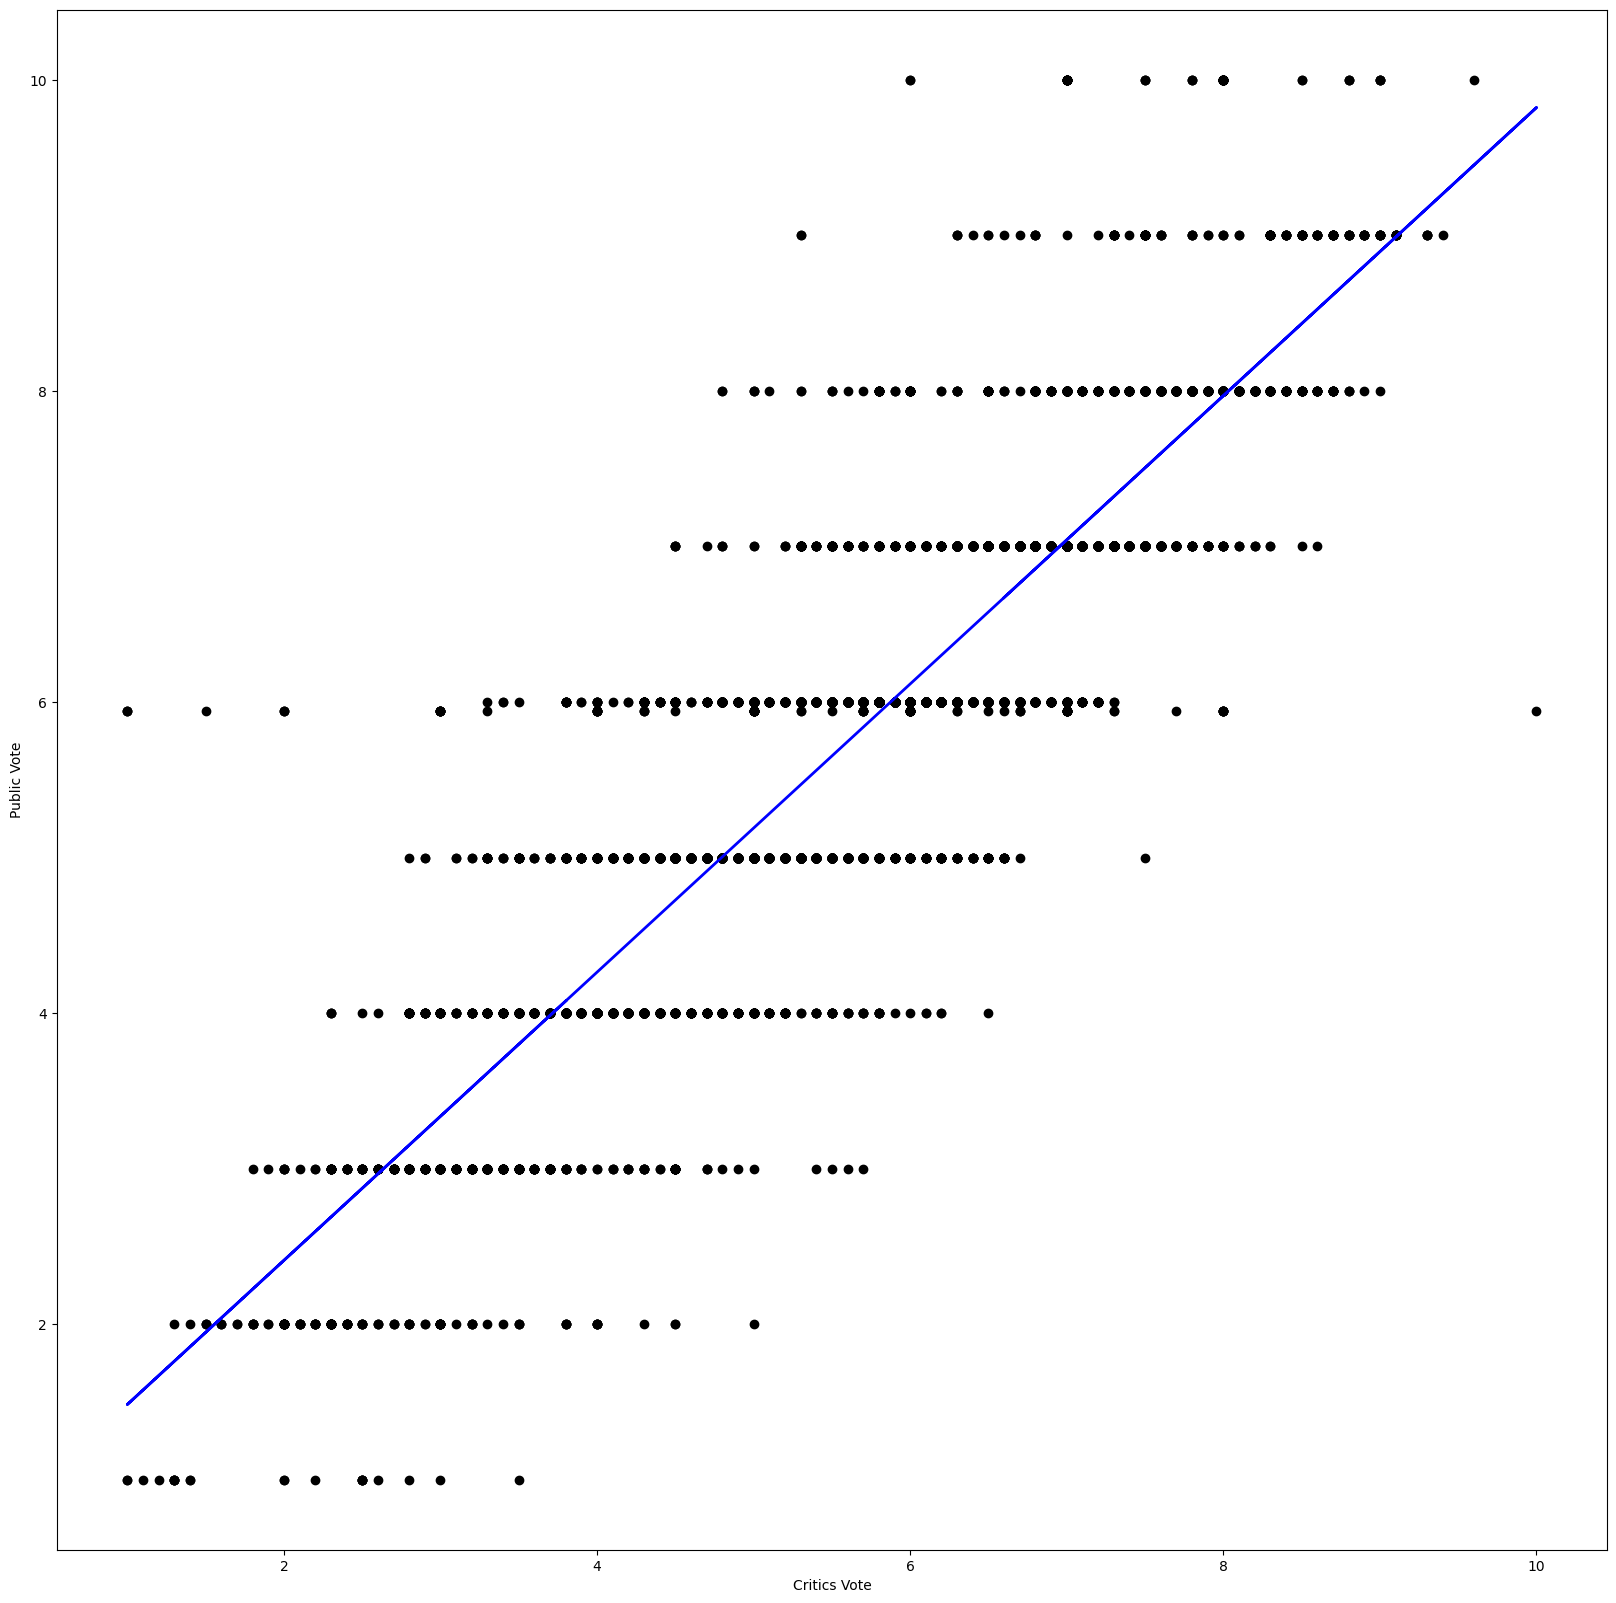

In [20]:
plt.figure(figsize=(20,20))
plt.scatter(X_test, y_test, c='black')
plt.plot(X_test, y_pred, c='blue', linewidth=2)
plt.xlabel("Critics Vote")
plt.ylabel("Public Vote")
plt.show()

## Hasil Prediksi

In [21]:
print("Nilai R-Suared Data Testing : ",round(reg.score(X_test, y_test),2))
print("MAE :", mean_absolute_error(y_test, y_pred))
print("MSE :", mean_squared_error(y_test, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Nilai R-Suared Data Training :",reg.score(X_train, y_train))

Nilai R-Suared Data Testing :  0.78
MAE : 0.5015420011537086
MSE : 0.47252105797105326
RMSE : 0.6874016714927694
Nilai R-Suared Data Training : 0.7811474476396763


# Unsupervised Learning

## B1. Mencari Nilai K

In [22]:
X = df[['avg_vote','critics_vote']].values
wcss = [] 

In [23]:
for k in range(1, 7):
    model = KMeans(n_clusters=k, n_init=10, random_state=0)
    model.fit(X)
    wcss.append(model.inertia_)

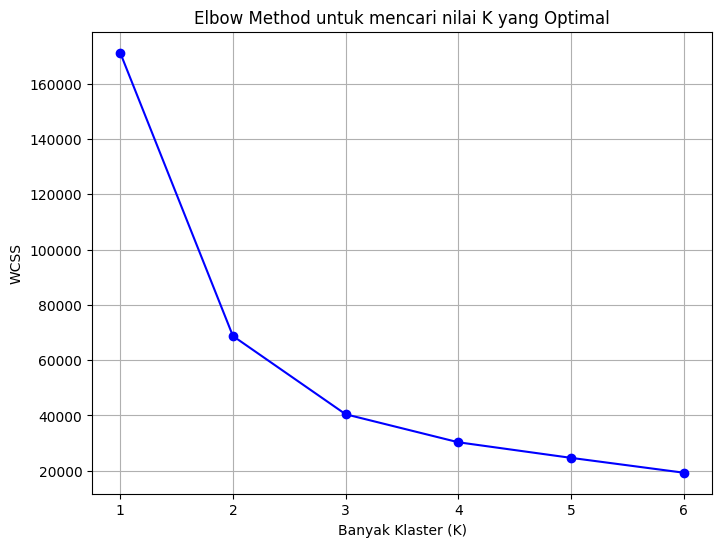

In [24]:
# Buat grafik Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 7), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method untuk mencari nilai K yang Optimal')
plt.xlabel('Banyak Klaster (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

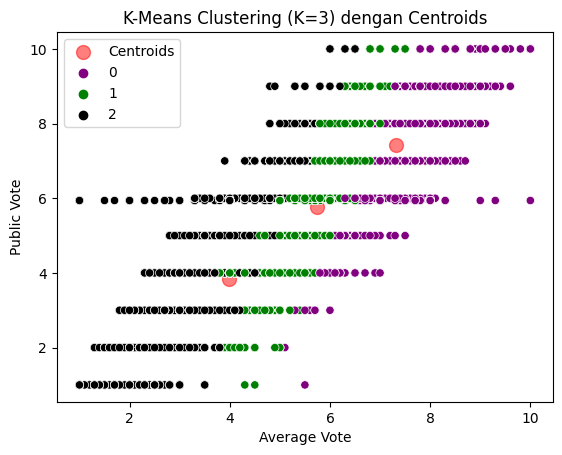

In [25]:
K = 3 # Pilih angka banyaknya kelompok (K)
kmeans = KMeans(n_clusters=K, n_init=10) # Inisialisasi K-Means
kmeans.fit(X) # Latih model K-Means berdasarkan data X
cluster_labels = kmeans.labels_ # Label kelompok dari model
df["cluster"] = cluster_labels # Tambahkan kolom prediksi
centroids = kmeans.cluster_centers_ # Titik pusat kelompok dari model
# Visualisasikan kelompok (kluster) data Iris
warna = ["purple", "green", "black"]
plt.scatter(centroids[:, 0], centroids[:, 1], alpha=0.5, c='red', s=100,

label='Centroids')

sns.scatterplot(data=df, x="avg_vote", y="public_vote",hue="cluster", palette=warna)

plt.title(f"K-Means Clustering (K={K}) dengan Centroids")
plt.xlabel("Average Vote")
plt.ylabel("Public Vote")
plt.legend()
plt.show()

## B2 HASIL EVALUASI 

In [26]:
# Variabel X dan cluster_labels diambil dari contoh di atas
from sklearn.metrics import silhouette_score, davies_bouldin_score,calinski_harabasz_score
ss_score = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {ss_score:.2f}")
db_index = davies_bouldin_score(X, cluster_labels)
print(f"Davies-Bouldin Index: {db_index:.2f}")
ch_index = calinski_harabasz_score(X, cluster_labels)
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.47
Davies-Bouldin Index: 0.69
Calinski-Harabasz Index: 65168.50


In [27]:
from sklearn.metrics import adjusted_rand_score # ARI
from sklearn.metrics import normalized_mutual_info_score # NMI
from sklearn.metrics import homogeneity_score, completeness_score,v_measure_score # HCV-M
# Buat crosstab untuk membandingkan cluster labels dengan true labels
cross_tab = pd.crosstab(df["cluster"], df["genre"])
print("Cross-Tabulation:")
print(cross_tab, "\n")
# Adjusted Rand Index (ARI)
ari = adjusted_rand_score(df["genre"], cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")
# Normalized Mutual Information (NMI)
# Konversi nama pada kolom ‘genre’ menjadi numerik
true_labels_num = df["genre"].astype("category").cat.codes
nmi = normalized_mutual_info_score(true_labels_num, cluster_labels)
print(f"Normalized Mutual Information (NMI): {nmi:.2f}")
# Fungsi HCV-M
homogeneity = homogeneity_score(df["genre"], cluster_labels)
completeness = completeness_score(df["genre"], cluster_labels)
v_measure = v_measure_score(df["genre"], cluster_labels)
print(f"Homogeneity Score: {homogeneity:.2f}")
print(f"Completeness Score: {completeness:.2f}")
print(f"V-Measure Score: {v_measure:.2f}")

Cross-Tabulation:
genre    Action  Adventure  Animation  Biblical  Biography  Comedy  Crime  \
cluster                                                                     
0           297        301        383         5        200    2015    165   
1           981        698        507        17        341    4178    213   
2           841        489        140        16        117    2893     79   

genre    Documentary  Drama  Fantasy  ...  Noir  Romantic  Short Movie  \
cluster                               ...                                
0               1049   5287      271  ...   162        91            3   
1                807   4793      704  ...    60       519            2   
2                146   1741      400  ...    11       322            0   

genre    Sperimental  Sport  Spy  Super-hero  Thriller  War  Western  
cluster                                                               
0                 90      2   74          24       665  164      281  
1           

# Sequential Model

In [28]:
model = Sequential([
    layers.Dense(64, activation='relu', input_shape=[1]),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='linear')
])

# Kompilasi model dengan loss function MSE
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error', 'mean_squared_error'])

# Mengambil fitur ('review_percentage') dan label ('rating') dari DataFrame 'df'
vote_X, vote_y = df[['avg_vote']], df['public_vote']

# Membagi dataset menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(
    vote_X, vote_y, test_size=0.2, random_state=42
)

# Melatih model dan simpan riwayat pelatihan
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluasi model
loss, mae, mse = model.evaluate(X_test, y_test)
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')

Epoch 1/100
1008/1008 [==============================] - 7s 5ms/step - loss: 1.3517 - mean_absolute_error: 0.6738 - mean_squared_error: 1.3517 - val_loss: 0.4865 - val_mean_absolute_error: 0.5034 - val_mean_squared_error: 0.4865
Epoch 2/100
1008/1008 [==============================] - 5s 5ms/step - loss: 0.4795 - mean_absolute_error: 0.5023 - mean_squared_error: 0.4795 - val_loss: 0.4861 - val_mean_absolute_error: 0.5049 - val_mean_squared_error: 0.4861
Epoch 3/100
1008/1008 [==============================] - 5s 5ms/step - loss: 0.4796 - mean_absolute_error: 0.5027 - mean_squared_error: 0.4796 - val_loss: 0.4896 - val_mean_absolute_error: 0.5098 - val_mean_squared_error: 0.4896
Epoch 4/100
1008/1008 [==============================] - 5s 5ms/step - loss: 0.4797 - mean_absolute_error: 0.5030 - mean_squared_error: 0.4797 - val_loss: 0.4986 - val_mean_absolute_error: 0.5195 - val_mean_squared_error: 0.4986
Epoch 5/100
1008/1008 [==============================] - 5s 5ms/step - loss: 0.4812 

## Menampilkan hasil dari r2_score

In [29]:
# Prediksi model
y_pred = model.predict(X_test)

# Menghitung R-squared (R2)
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2): {r2}')

252/252 [==============================] - 1s 2ms/step
R-squared (R2): 0.772047379004208


## Membuat grafik yang menampilkan pergerakan metrik (akurasi/error) dan loss terhadap epoch baik pada training maupun validation

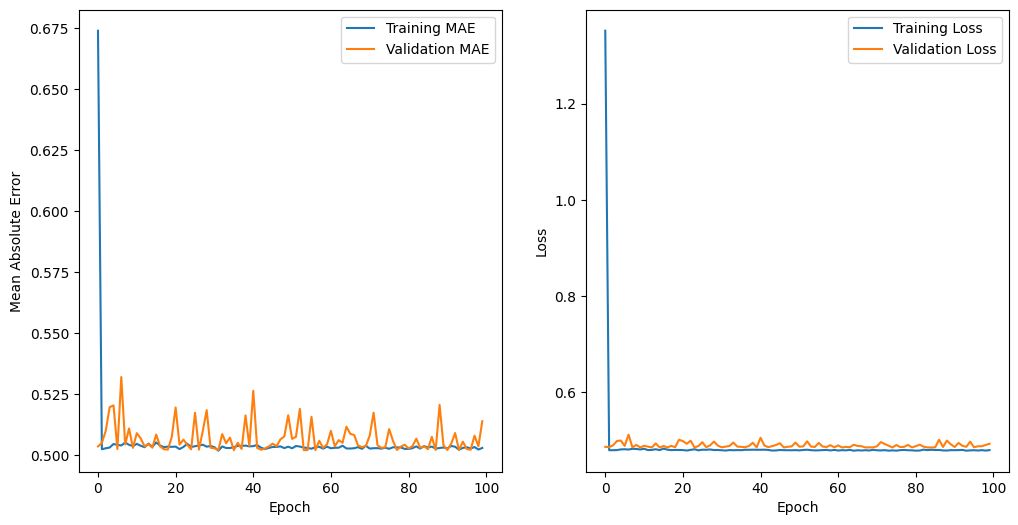

In [30]:
# Ambil metrik pelatihan dan validasi dari riwayat
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']
mse = history.history['mean_squared_error']
val_mse = history.history['val_mean_squared_error']

# Ambil loss dari riwayat
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot MAE dan Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(mae, label='Training MAE')
plt.plot(val_mae, label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
